## Exploratory analysis of data

In [114]:
import numpy as np    
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

#### Data

Train - 59400  rows of data with 40 features
Train labels - 59400 labels

In [115]:
tr_val = pd.read_csv('data/train_values.csv') # train set data

In [116]:
tr_labels = pd.read_csv('data/train_labels.csv',usecols=["status_group"]) #train set labels data

In [117]:
df=pd.concat([tr_val, tr_labels], axis=1) # train

#### Explore columns

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Most of the columns are categorical columns

#### Balanced dataset?

In [119]:
df.groupby('status_group').id.count()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
Name: id, dtype: int64

As we can see dataset isn't balanced dataset

In [120]:
df.isna().sum().sort_values(ascending=False) # looking at misssing values

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
payment                      0
waterpoint_type_group        0
extraction_type_group        0
extraction_type_class        0
waterpoint_type              0
management                   0
management_group             0
source_class                 0
source_type                  0
water_quality                0
quality_group                0
extraction_type              0
quantity                     0
quantity_group               0
source                       0
payment_type                 0
id                           0
construction_year            0
basin                        0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
region  

### Exploring the reations between columns

####  1. quantity_group and quantity 

In [121]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

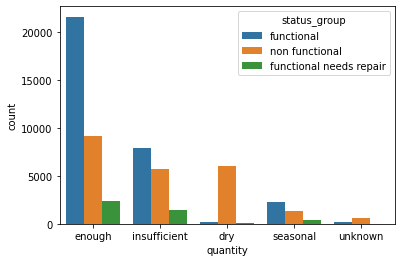

In [122]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

Seems like two columns have same set of categories.
If water point is dry/unkown status group more tends to be non-functional and if water point is enough it more like to be functional one

In [123]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### 2. waterpoint_type_group and waterpoint_type 

In [124]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

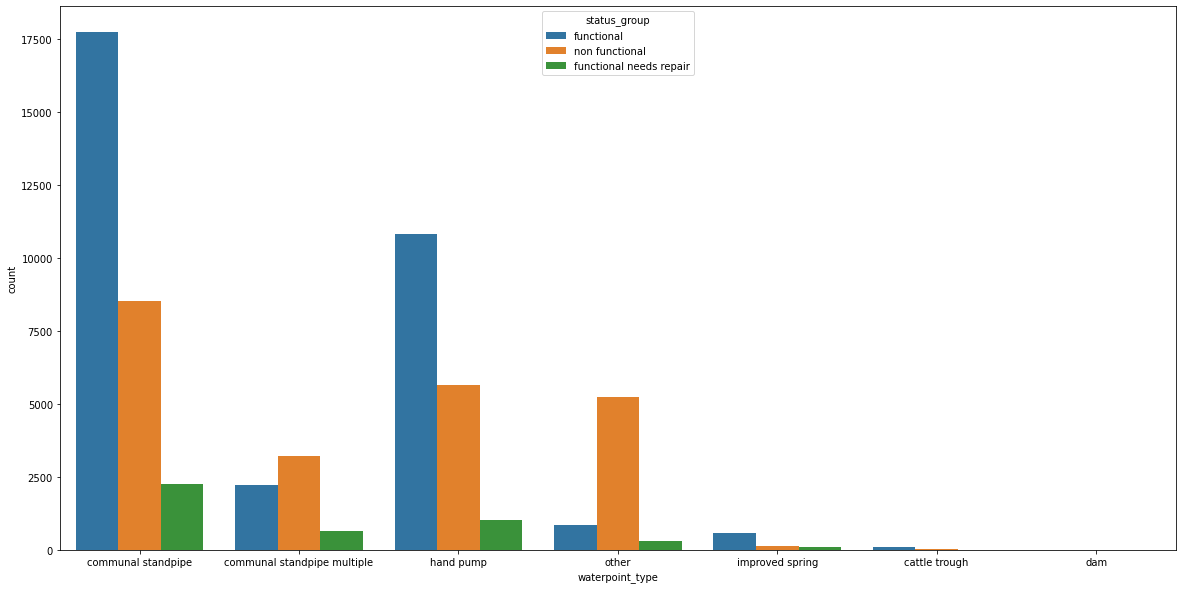

In [125]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

In [126]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

#### 3. quality_group and water_quality

In [127]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

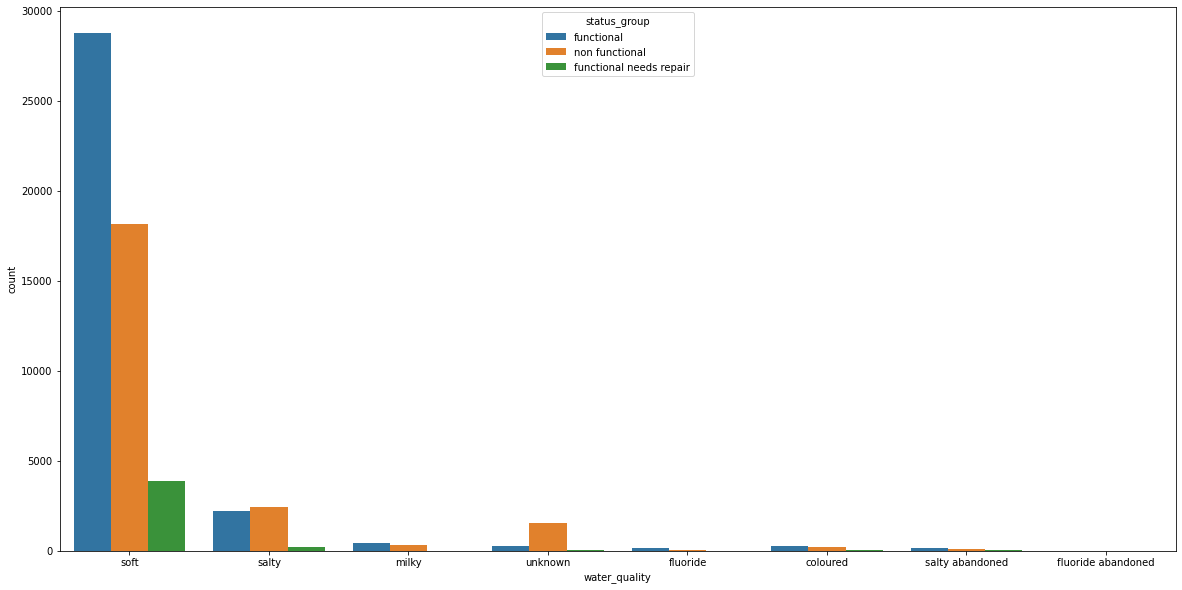

In [128]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

In [129]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

It's clear that there are soft water resoureces which have the most non functional wells

#### 4. payment_type  and payment

In [130]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [131]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Two columns have same set of categories

#### 5.  extraction_type_class, extraction_type and extraction_type_group

In [132]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

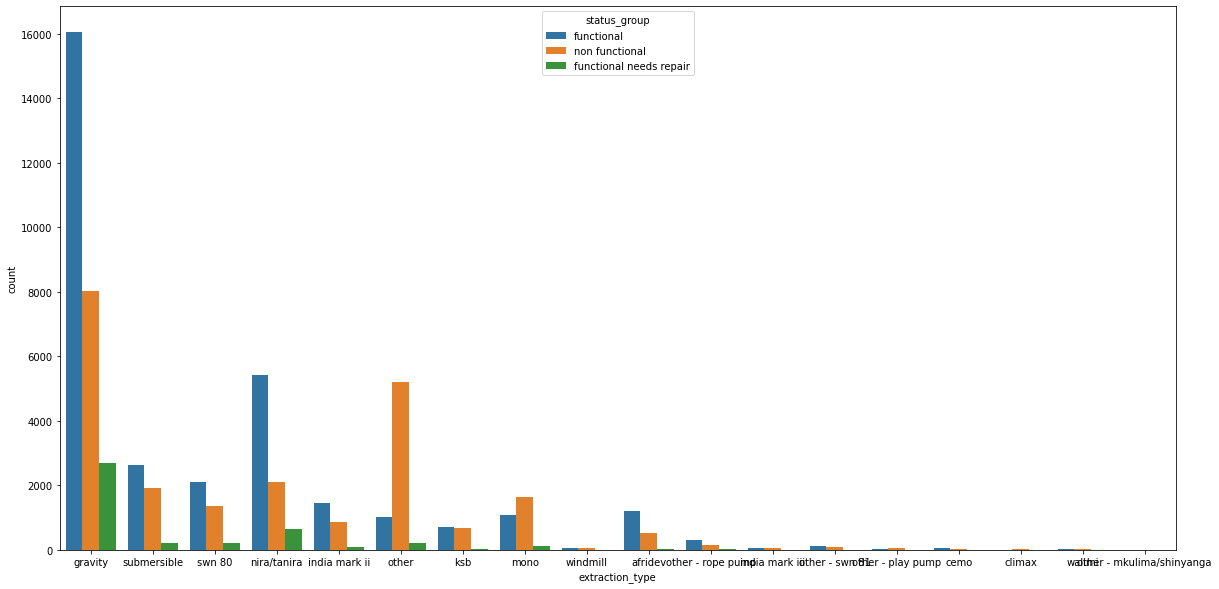

In [133]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type', hue="status_group", data=df)

In [134]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [135]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

Seems like these three columns have same set of contibution to the target. We will extraction_type_class and extraction_type

#### 6.  management ,scheme_management  and management_group columns

In [136]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [137]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [138]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [139]:
df.groupby(['management_group','management']).count() 

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     663   
                 private operator   1971        1971           1971    1957   
                 trust                78          78             78      78   
                 water authority     904         904            904     836   
other            other               844         844            844     837   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1624   
unknown          unknown             561         561            561     533   
user-group       vwc               40507       40507          40507   37632   
                 water board        2933        2933           2933    2715   
                 wua                2535        2535           2535    2308   
                 wug                6515        6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  basin  subvillage  \
management_group management                                                   
commercial       company                685          685    685         685   
                 private operator      1971         1971   1971        1932   
                 trust                   78           78     78          78   
                 water authority        904          904    904         895   
other            other                  844          844    844         839   
                 other - school          99           99     99          99   
parastatal       parastatal            1768         1768   1768        1768   
unknown          unknown                561          561    561         561   
user-group       vwc                  40507        40507  40507       40189   
                 water board           2933         2933   2933        2933   
                 wua                   2535         2535   2535        2535   
                 wug                   6515         6515   6515        6515   

                                   region  region_code  district_code    lga  \
management_group management                                                    
commercial       company              685          685            685    685   
                 private operator    1971         1971           1971   1971   
                 trust                 78           78             78     78   
                 water authority      904          904            904    904   
other            other                844          844            844    844   
                 other - school        99           99             99     99   
parastatal       parastatal          1768        

#### 7.  source_type , source_class  and source 

In [140]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [141]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [142]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

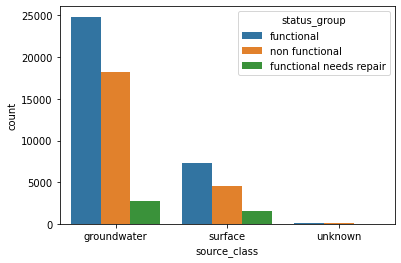

In [143]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

Even though more functional point in the ground water there are  considerable amount of non-functional pumps in with th ground water aswell.

In [144]:
df.groupby(['source_class','source']).count()

id  amount_tsh  date_recorded  funder  \
source_class source                                                           
groundwater  hand dtw                874         874            874     868   
             machine dbh           11075       11075          11075   10252   
             shallow well          16824       16824          16824   16302   
             spring                17021       17021          17021   15870   
surface      dam                     656         656            656     647   
             lake                    765         765            765     763   
             rainwater harvesting   2295        2295           2295    2099   
             river                  9612        9612           9612    8715   
unknown      other                   212         212            212     204   
             unknown                  66          66             66      45   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                     874        868        874       874   
             machine dbh                11075      10246      11075     11075   
             shallow well               16824      16286      16824     16824   
             spring                     17021      15870      17021     17021   
surface      dam                          656        646        656       656   
             lake                         765        762        765       765   
             rainwater harvesting        2295       2096       2295      2295   
             river                       9612       8721       9612      9612   
unknown      other                        212        204        212       212   
             unknown                       66         46         66        66   

                                   wpt_name  num_private  basin  subvillage  \
source_class source                                                           
groundwater  hand dtw                   874          874    874         874   
             machine dbh              11075        11075  11075       10849   
             shallow well             16824        16824  16824       16817   
             spring                   17021        17021  17021       16886   
surface      dam                        656          656    656         656   
             lake                       765          765    765         764   
             rainwater harvesting      2295         2295   2295        2293   
             river                     9612         9612   9612        9612   
unknown      other                      212          212    212         212   
             unknown                     66           66     66          66   

                                   region  region_code  district_code    lga  \
source_class source                                                            
groundwater  hand dtw                 874          874            874    874   
             machine dbh            11075        11075          11075  11075   
             shallow well           16824        16824          16824  16824   
             spring                 17021        17021          17021  17021   
surface      dam                      656          656            656    656   
             lake                     765          765            765    765   
             rainwater harvesting    2295         2295           2295   2295   
             river                   9612         9612           9612   9612   
unknown      other                    212          212            212    212   
             unknown                   66           66             66     66   

                                    ward  population  public_meeting  \
source_class source                                                    
groundwater  hand dtw                874         874          